In [10]:
import jax
import jax.numpy as jnp
from tqdm import tqdm
import seaborn as sns

sns.set(style="whitegrid")

In [11]:
@jax.jit
def beale(theta: jnp.DeviceArray) -> jnp.DeviceArray:
  x = jnp.dot(theta, jnp.array([1., 0.]))
  y = jnp.dot(theta, jnp.array([0., 1.]))
  xy = jnp.dot(x, y)
  xyy = jnp.dot(xy, y)
  xyyy = jnp.dot(xyy, y)
  return jnp.power(1.5 - x + xy, 2) + jnp.power(2.25 - x + xyy, 2) + jnp.power(2.625 - x + xyyy, 2)

@jax.jit
def rosenbrock(theta: jnp.DeviceArray) -> jnp.DeviceArray:
  x = jnp.dot(theta, jnp.array([1., 0.]))
  y = jnp.dot(theta, jnp.array([0., 1.]))
  return jnp.power(1 - x, 2) + 100 * jnp.power(y - x * x, 2)

def FGD(params, loss, key, step_size=5e-4):
    v = jax.random.normal(key, shape=params.shape)
    _, dd = jax.jvp(loss, (params,), (v,))
    step = step_size * dd
    return params - step * v

In [12]:
theta = jnp.array([-1., 0.])
xs = []
ys = []
f_val = []

for i in tqdm(range(25000)):
    theta = FGD(theta, rosenbrock, jax.random.PRNGKey(i), step_size=5e-4)
    xs.append(float(theta[0]))
    ys.append(float(theta[1]))
    f_val.append(float(rosenbrock(theta)))

100%|██████████| 25000/25000 [01:42<00:00, 244.73it/s]


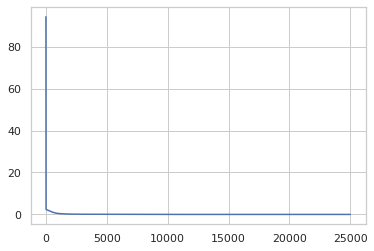

In [13]:
sns.lineplot(x=[i for i in range(len(f_val))], y=f_val)

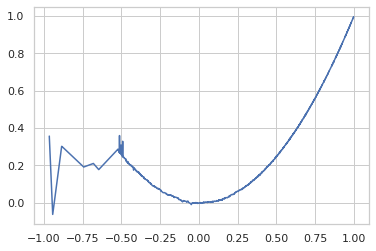

In [14]:
sns.lineplot(x=xs, y=ys)